# **Ajuste de hiperparámetros de los modelos con mayor rendimiento (Recall ,F1-score)**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


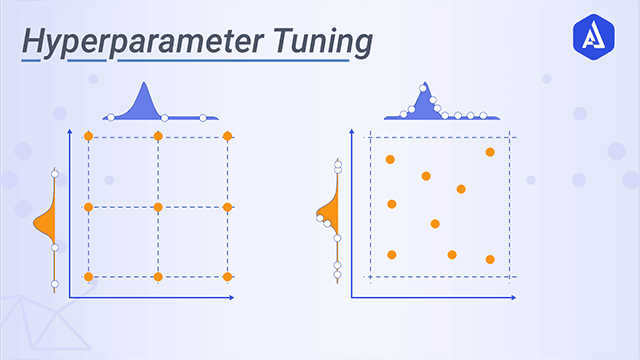

In [ ]:
#@title Ajuste de hiperparámetros
from IPython.display import Image
Image("/content/drive/MyDrive/imagen dos tunnin hyper.png")

El ajuste de hiperparámetros es el proceso de determinar la combinación correcta de hiperparámetros que permite que el modelo maximice el rendimiento  Establecer la combinación correcta de hiperparámetros es la única forma de extraer el máximo rendimiento de los modelos.

Los hiperparámetros son parámetros del modelo cuyos valores se establecen antes del  entrenamiento. Todos son números que se establecen antes de la fase 
de entrenamiento y sus valores afectan el comportamiento del modelo.

**Qué modelos resultaron ser los mejores luego de aplicar sampling para manejar los datos desequilibrados?**

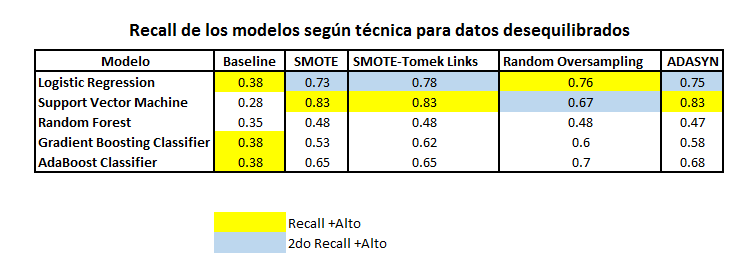

In [ ]:
#@title Recall de los modelos según la técnica de sampling
from IPython.display import Image
Image("/content/drive/MyDrive/recall de los modelos.PNG")

Después de aplicar los 5 modelos, con las 4 distintas técnicas de sampling (Oversampling, SMOTE, SMOTE-TOMELINK y ADASYN) para datos desequilibrados y modelos Baseline, se procedió a seleccionar los 2 modelos con el mayor rendimiento (Recall-f1-score). Los 2 modelos seleccionados fueron, Support Vector Machine y Logistic Regression, ya que como se muestra en el cuadro tienen los 2 recall más altos. El recall para support vector machine es de 0.83, mientras que el recall para Logistic Regression es de 0.78,  0.75 y 0.73 respectivamente, para las técnicas SMOTE-Tome Links, ADASYN y SMOTE.

Después de hacer pruebas con las distintas técnicas de sampling, se logró mejor rendimiento con las técnicas de Smote-TOMEKLINK, ADASYNC y SMOTE

In [ ]:
# 1. Libraries Implemented
## Classification Algorithms

from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,classification_report,f1_score,recall_score,precision_score,accuracy_score,precision_recall_curve,roc_curve,roc_auc_score
import matplotlib.gridspec as gridspec

from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder

import pandas as pd
import numpy as np

# importing ploting libraries
import matplotlib.pyplot as plt   
# To enable plotting graphs in Jupyter notebook
%matplotlib inline
#importing seaborn for statistical plots
import seaborn as sns


# Libraries for constructing Pipelines
from sklearn.pipeline import Pipeline, make_pipeline

from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score

# Library for Normalization of Numerical Data
from scipy.stats import zscore

# calculate accuracy measures and confusion matrix
from sklearn import metrics
from sklearn.metrics import confusion_matrix

# Suppress warnings
import warnings
warnings.filterwarnings("ignore")

**Fuente de datos**

La fuente de datos para el proyecto actual se toma del repositorio de Kaggle con el siguiente [Link](https://www.kaggle.com/uciml/german-credit)

In [ ]:
## 2.2 Data Loading

In [ ]:
credit = pd.read_csv("/content/drive/MyDrive/german_credit_data.csv") # carga de data desde google Drive

In [ ]:
credit.head()   # 5 primeras filas de la data

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


In [ ]:
credit.drop('Unnamed: 0', axis=1, inplace=True) # Eliminando columna Unnamed del dataframe

In [ ]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 78.2+ KB


In [ ]:
credit.head() # Validando que la columna Unnamed: se elimino

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


In [ ]:
credit["Default"] = credit["Risk"] # Creando la variable Default  (asignación de Risk a Default)
credit.info() # Validando que la variable Default se creo

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
 10  Default           1000 non-null   object
dtypes: int64(4), object(7)
memory usage: 86.1+ KB


In [ ]:
credit = credit.drop(columns="Risk")  # Eliminando la varible Risk

In [ ]:

credit.info # Validando que la variable Risk  se elimino

<bound method DataFrame.info of      Age     Sex  Job  ... Duration              Purpose Default
0     67    male    2  ...        6             radio/TV    good
1     22  female    2  ...       48             radio/TV     bad
2     49    male    1  ...       12            education    good
3     45    male    2  ...       42  furniture/equipment    good
4     53    male    2  ...       24                  car     bad
..   ...     ...  ...  ...      ...                  ...     ...
995   31  female    1  ...       12  furniture/equipment    good
996   40    male    3  ...       30                  car    good
997   38    male    2  ...       12             radio/TV    good
998   23    male    2  ...       45             radio/TV     bad
999   27    male    2  ...       45                  car    good

[1000 rows x 10 columns]>

In [ ]:
credit.head()  

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Default
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


In [ ]:
credit['Default'].value_counts()

good    700
bad     300
Name: Default, dtype: int64

In [ ]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Default           1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 78.2+ KB


Se Remueve NAN's

In [ ]:
credit.isnull().sum()

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Default               0
dtype: int64

In [ ]:
# Removing NaN's from 'Saving accounts' and 'Checking account' column

In [ ]:
credit['Saving accounts'] = credit['Saving accounts'].fillna(value = 'NA') # Elimina los NA

In [ ]:
print(credit['Saving accounts'].value_counts())  # frecuencia de las categorias de Saving accounts

#Construye la distribución de frecuencias de la variable Saving accounts, con los NA

little        603
NA            183
moderate      103
quite rich     63
rich           48
Name: Saving accounts, dtype: int64


In [ ]:
credit['Checking account'] = credit['Checking account'].fillna(value = 'NA')

In [ ]:
credit['Checking account'].value_counts() #

NA          394
little      274
moderate    269
rich         63
Name: Checking account, dtype: int64

In [ ]:
credit.isnull().sum()  # Comprobando que elimino los NA

Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Purpose             0
Default             0
dtype: int64

In [ ]:
credit.head()  

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Default
0,67,male,2,own,NA,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NA,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


Feature Engineering

Según la inferencia de 'Cuenta de ahorros' y 'Cuenta corriente', podemos agrupar las columnas en 3 categorías:

'Little'

'Moderate'

'Other'

In [ ]:
# 'Saving Account'
credit['Saving accounts']=credit['Saving accounts'].map({'little': 'little', 'moderate': 'moderate', 'quite rich':'other','rich':'other', 'NA':'other' })

In [ ]:
# 'Checking Account'
credit['Checking account']= credit['Checking account'].map({'little': 'little', 'moderate': 'moderate','rich':'other', 'NA':'other' })

In [ ]:
## LabeEncoding the Purpose column
le = LabelEncoder()
credit['Purpose'] = le.fit_transform(credit['Purpose'])

In [ ]:
print("The various purposes are: ", le.classes_.tolist(), "\nAnd the hot encoded numbers for the same are", credit['Purpose'].unique().tolist())

The various purposes are:  ['business', 'car', 'domestic appliances', 'education', 'furniture/equipment', 'radio/TV', 'repairs', 'vacation/others'] 
And the hot encoded numbers for the same are [5, 3, 4, 1, 0, 2, 6, 7]


In [ ]:
credit.head() 

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Default
0,67,male,2,own,other,little,1169,6,5,good
1,22,female,2,own,little,moderate,5951,48,5,bad
2,49,male,1,own,little,other,2096,12,3,good
3,45,male,2,free,little,little,7882,42,4,good
4,53,male,2,free,little,little,4870,24,1,bad


 Data Processing

Assigning 'Dependent' and 'Independent' Features

In [ ]:
##credit['default'] = credit['default'].map({'no':0, 'yes': 1})

credit['Default'] = credit['Default'].map({'good':0, 'bad': 1})

In [ ]:
print(credit['Default'].value_counts()) ## Distribución de frecuencia del target Default

0    700
1    300
Name: Default, dtype: int64


In [ ]:
#separating the y-column from the rest of the data

X=credit.drop("Default", axis=1)

y=credit["Default"]


In [ ]:
x1 = X.copy()

In [ ]:
x1

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,2,own,other,little,1169,6,5
1,22,female,2,own,little,moderate,5951,48,5
2,49,male,1,own,little,other,2096,12,3
3,45,male,2,free,little,little,7882,42,4
4,53,male,2,free,little,little,4870,24,1
...,...,...,...,...,...,...,...,...,...
995,31,female,1,own,little,other,1736,12,4
996,40,male,3,own,little,little,3857,30,1
997,38,male,2,own,little,other,804,12,5
998,23,male,2,free,little,little,1845,45,5


### 5.1.2 Data Stadardization: Dummification of Categorical Columns and Estandarizacion of Numerical Columns

In [ ]:
# List to store Categorical Columns
cat_cols = list(x1.columns[x1.dtypes == 'object'])
print("Categorical Columns: ",cat_cols)


Categorical Columns:  ['Sex', 'Housing', 'Saving accounts', 'Checking account']


In [ ]:
# List to store Numerical Columns

num_cols = list(x1.columns[x1.dtypes!= 'object'])
print("\nNumerical Columns:" ,num_cols)



Numerical Columns: ['Age', 'Job', 'Credit amount', 'Duration', 'Purpose']


###### *Etiquetado de caracteristicas categoricas:
    
###### La mayor parte de los agoritmos de ML, trabajan con caracteristicas numericas.    

In [ ]:
## One-Hot Encoding Categorical Columns
## drop_first=True evita la multicolibnealidad entre las caracteristicas

x1_dummy=pd.get_dummies(x1[cat_cols], drop_first=True)


In [ ]:
x1_dummy 

,Sex_male,Housing_own,Housing_rent,Saving accounts_moderate,Saving accounts_other,Checking account_moderate,Checking account_other
0,1,1,0,0,1,0,0
1,0,1,0,0,0,1,0
2,1,1,0,0,0,0,1
3,1,0,0,0,0,0,0
4,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...
995,0,1,0,0,0,0,1
996,1,1,0,0,0,0,0
997,1,1,0,0,0,0,1
998,1,0,0,0,0,0,0


In [ ]:
## Joining New dummified and Numerical columns
x_new = pd.concat([x1_dummy, x1[num_cols]], axis=1, join='inner')
#x_new = pd.concat([x1_dummy, x1[num_cols]], axis=1, join='inner')

In [ ]:
x_new

,Sex_male,Housing_own,Housing_rent,Saving accounts_moderate,Saving accounts_other,Checking account_moderate,Checking account_other,Age,Job,Credit amount,Duration,Purpose
0,1,1,0,0,1,0,0,67,2,1169,6,5
1,0,1,0,0,0,1,0,22,2,5951,48,5
2,1,1,0,0,0,0,1,49,1,2096,12,3
3,1,0,0,0,0,0,0,45,2,7882,42,4
4,1,0,0,0,0,0,0,53,2,4870,24,1
...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,1,0,0,0,0,1,31,1,1736,12,4
996,1,1,0,0,0,0,0,40,3,3857,30,1
997,1,1,0,0,0,0,1,38,2,804,12,5
998,1,0,0,0,0,0,0,23,2,1845,45,5


###### Estandarización: 
    
StandardScaler estandariza una característica restando la media y 
luego escalando a la varianza de la unidad. La varianza unitaria significa dividir 
todos los valores por la desviación estándar. 

In [ ]:

## Estandarización: StandardScaler estandariza una característica restando la media y 
## luego escalando a la varianza de la unidad. La varianza unitaria significa dividir 
## todos los valores por la desviación estándar. 

#### Normalizing the Dataset
ss = StandardScaler()
x_normal = ss.fit_transform(x_new)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split, StratifiedKFold
from sklearn.metrics import confusion_matrix, recall_score, roc_auc_score, accuracy_score, f1_score
from sklearn.model_selection import cross_val_score
from imblearn.pipeline import Pipeline, make_pipeline


 Dividing the Data into 'Train', 'Validation' and 'Test' Sets.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_normal, y, test_size = 0.2, random_state = 2020,stratify=y)

random_state :

Se usa básicamente para reproducir su problema de la misma manera cada vez que se ejecuta. Si no usa un estado_aleatorio en train_test_split, cada vez que realice la división, es posible que obtenga un conjunto diferente de puntos de datos de Test y train y no lo ayudará a depurar en caso de que tenga un problema.

Es solo para asegurarse de obtener la misma división cada vez que ejecuta su script. Leyendo sobre generadores de números pseudoaleatorios, (un número como 32525352 tendría el mismo efecto que 0 o 1; es solo una constante que se asigna a algún estado interno) Si no lo hace, se inicializa en función del tiempo, lo que da como resultado, resultados diferentes en la mayoría de sus ejecuciones

In [ ]:
#### En el siguiente paso se busca mantener las poporcions de desequilibrio tanto en test como en prueba

In [ ]:
# Results from split
train_0, train_1 = len(y_train[y_train==0]), len(y_train[y_train==1])
test_0, test_1 = len(y_test[y_test==0]), len(y_test[y_test==1])
print('>Train: 0=%d, 1=%d, Test: 0=%d, 1=%d' % (train_0, train_1, test_0, test_1))

>Train: 0=560, 1=240, Test: 0=140, 1=60


###### SMOTE Oversampling for the Minority Class


In [ ]:
from collections import Counter
from imblearn.over_sampling import SMOTE
# summarize class distribution
print(Counter(y_train))
# define oversample strategy
oversample = SMOTE(sampling_strategy=1)
# fit and apply the transform
X_sample, y_sample = oversample.fit_resample(X_train, y_train)
# summarize class distribution
print(Counter(y_sample))

Counter({0: 560, 1: 240})
Counter({1: 560, 0: 560})


In [ ]:
# Tunnning de hyperparametros de SVM con smote

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm 
from sklearn.svm import SVC


# param_grid = { 'C':[0.1,1,100,1000],'kernel':['rbf','poly','sigmoid','linear'],'degree':[1,2,3,4,5,6],'gamma': [1, 0.1, 0.01, 0.001, 0.0001]}



param_grid = {'C':[0.1,0.01,1,100,1000], 'kernel':['rbf','sigmoid','linear'],'gamma': [1, 0.1, 0.01, 0.001, 0.0001]}

svm = SVC(random_state=1)
svm_grid = GridSearchCV(svm,param_grid,verbose=0,n_jobs=-1, scoring='recall',cv=10)
svm_grid.fit(X_sample,y_sample)
best_parameters = svm_grid.best_params_
print(best_parameters)
best_result = svm_grid.best_score_ # Mean cross-validated score of the best_estimator
print(best_result)



{'C': 0.01, 'gamma': 1, 'kernel': 'rbf'}
0.9285714285714286


In [ ]:
# Tunnning de hyperparameter de Regresion logistica con smote

In [ ]:
param_grid = {'solver':['newton-cg', 'lbfgs', 'liblinear', 'none'], 'C':[0.001,.009,0.01,.09,1,5,10,25], 
              'penalty':[ 'l1', 'l2', 'elasticnet']}


lr = LogisticRegression(random_state=1)


lr_grid = GridSearchCV(lr,param_grid,verbose=0,n_jobs=-1, scoring='recall',cv=10)

lr_grid.fit(X_sample, y_sample)


best_parameters = lr_grid.best_params_
print(best_parameters)

best_result = lr_grid.best_score_ # Mean cross-validated score of the best_estimator

print(best_result)


{'C': 0.009, 'penalty': 'l1', 'solver': 'liblinear'}
0.7964285714285715


In [ ]:
#Tunning de hyperparameters con SMOTE-TOMELINK

In [ ]:

from collections import Counter
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks
# summarize class distribution
print(Counter(y_train))
# define oversample strategy
sample = SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'))
# fit and apply the transform
X_sample, y_sample = sample.fit_resample(X_train, y_train)
# summarize class distribution
print(Counter(y_sample))

Counter({0: 560, 1: 240})
Counter({1: 560, 0: 523})


In [ ]:

from sklearn.model_selection import GridSearchCV

param_grid = {'C':[0.1,0.01,1,100,1000], 'kernel':['rbf','sigmoid','linear'],'gamma': [1,10, 0.1, 0.01, 0.001, 0.0001]}


svm = SVC(random_state=1)
svm_grid = GridSearchCV(svm,param_grid,verbose=0,n_jobs=-1, scoring='recall',cv=10)
svm_grid.fit(X_sample,y_sample)
best_parameters = svm_grid.best_params_
print(best_parameters)

best_result = svm_grid.best_score_ # Mean cross-validated score of the best_estimator

print(best_result)


{'C': 0.1, 'gamma': 10, 'kernel': 'rbf'}
1.0


In [ ]:
param_grid = {'solver':['newton-cg', 'lbfgs', 'liblinear', 'none'], 'C':[0.001,.009,0.01,.09,1,5,10,25], 
              'penalty':[ 'l1', 'l2', 'elasticnet']}

lr = LogisticRegression(random_state=1)


lr_grid = GridSearchCV(lr,param_grid,verbose=0,n_jobs=-1, scoring='recall',cv=10)

lr_grid.fit(X_sample, y_sample)


best_parameters = lr_grid.best_params_
print(best_parameters)

best_result = lr_grid.best_score_ # Mean cross-validated score of the best_estimator

print(best_result)


{'C': 0.009, 'penalty': 'l1', 'solver': 'liblinear'}
0.8017857142857142


In [ ]:
# Método ADASYN

In [ ]:
# Hay que instalar una de estas dos para ADASYN

#!pip install imbalanced-learn
#!pip install -U imbalanced-learn

In [ ]:
# ADASYN
from imblearn.over_sampling import ADASYN
sampler = ADASYN(sampling_strategy=1)
X_sample,y_sample = sampler.fit_resample(X_train, y_train)

print(Counter(y_train))
print(Counter(y_sample))


Counter({0: 560, 1: 240})
Counter({0: 560, 1: 546})


In [ ]:
# Support vector machine

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm 
from sklearn.svm import SVC


param_grid = {'C':[0.1,0.01,1,100,1000], 'kernel':['rbf','sigmoid','linear'],'gamma': [1, 0.1, 0.01, 0.001, 0.0001]}

svm = SVC(random_state=1)
svm_grid = GridSearchCV(svm,param_grid,verbose=0,n_jobs=-1, scoring='recall',cv=10)
svm_grid.fit(X_sample,y_sample)
best_parameters = svm_grid.best_params_
print(best_parameters)
best_result = svm_grid.best_score_ # Mean cross-validated score of the best_estimator
print(best_result)


{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}
0.8667676767676769


In [ ]:
# Regresión logística

In [ ]:
param_grid = {'solver':['newton-cg', 'lbfgs', 'liblinear', 'none'], 'C':[0.001,.009,0.01,.09,1,5,10,25], 
              'penalty':[ 'l1', 'l2', 'elasticnet']}

lr = LogisticRegression(random_state=1)


lr_grid = GridSearchCV(lr,param_grid,verbose=0,n_jobs=-1, scoring='recall',cv=10)

lr_grid.fit(X_sample, y_sample)


best_parameters = lr_grid.best_params_
print(best_parameters)

best_result = lr_grid.best_score_ # Mean cross-validated score of the best_estimator

print(best_result)


{'C': 0.009, 'penalty': 'l1', 'solver': 'liblinear'}
0.7507407407407408


Luego de experimentar  con las técnicas de sampling para manejo de datos desequilibrados/desbalanceados, se encontró que los  modelos con mayor rendimiento era  Support Vector Machine y Logistic Regression, para las técnicas **SMOTE, SMOTETomek y ADASYN**



Usando las técnicas de sampling **SMOTE, SMOTETomek y ADASYN** en el ajuste de hiperparámetros, con los mejores modelos encontrados. Resultó que el mejor modelo tanto para SMOTE SMOTETomek y ADASYN, es   Support Vector Machine  con un recall de 0.93, 1  y 0.87 respectivamente.




Por lo que, ahora se procederá a ejecutar un modelo de  Support Vector Machine con SMOTETomek, con los mejores parámetros encontrados en el ajuste.





**Mejores parámetros para   Support Vector Machine:**





{'C': 0.1, 'gamma': 10, 'kernel': 'rbf'}



**Mejor Modelo con SMOTE-TomeLink**

Después de aplicar la **optimización (ajuste de hiperparámetros)**, el mejor modelo es  **Support vector machine con la técnica de sampling para datos desequilibrados  SMOTETomek**, con los mejores parámetros dado por:







# {'C': 0.1, 'gamma': 10, 'kernel': 'rbf'} 





Ahora se procederá a ejecutar el modelo Support Vector Machine con la técnica SMOTETomek y los mejores parámetros encontrados en el ajuste.

In [ ]:
from collections import Counter
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks
# summarize class distribution
print(Counter(y_train))
# define oversample strategy
sample = SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'))
# fit and apply the transform
X_sample, y_sample = sample.fit_resample(X_train, y_train)
# summarize class distribution
print(Counter(y_sample))

Counter({0: 560, 1: 240})
Counter({1: 560, 0: 535})


In [ ]:
# Función para calcular las medidas de rendimiento en datos de train y test
def build_model_train_test(model,x_train,x_test,y_train,y_test):
    model.fit(x_train,y_train)

    y_pred = model.predict(x_train)
    
    print("\n----------Accuracy Scores on Train data------------------------------------")
    print("F1 Score: ", f1_score(y_train,y_pred))
    print("Precision Score: ", precision_score(y_train,y_pred))
    print("Recall Score: ", recall_score(y_train,y_pred))


    print("\n----------Accuracy Scores on Test data------------------------------------")
    y_pred_test = model.predict(x_test)
    
    print("F1 Score: ", f1_score(y_test,y_pred_test))
    print("Precision Score: ", precision_score(y_test,y_pred_test))
    print("Recall Score: ", recall_score(y_test,y_pred_test))

    



In [ ]:
from sklearn.svm import SVC

#svm = SVC(kernel ='linear', random_state = 0)

svm = SVC(C=0.1,gamma=10,kernel='rbf', random_state = 0)


#lm.fit(X_sample, y_sample)
build_model_train_test(svm, X_sample, X_test,y_sample,y_test)


----------Accuracy Scores on Train data------------------------------------
F1 Score:  0.676737160120846
Precision Score:  0.5114155251141552
Recall Score:  1.0

----------Accuracy Scores on Test data------------------------------------
F1 Score:  0.4615384615384615
Precision Score:  0.3
Recall Score:  1.0


De los resultados anteriores, se observa que el recall tanto para la data de train como de test es de 1, y la medida F1 score para data train y test es de 0.68 y 0.46 respectivamente.

In [ ]:
#codigo de Javascript para que google colab no se desconecte a los 90 min
# function ClickConnect(){ console.log("Working"); document.querySelector("colab-connect-button").click() }setInterval(ClickConnect,6000)
3798